In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss

In [201]:
books = pd.read_csv("/Users/rahulnair/Desktop/Labelmaster_/data/Books_data.csv")

In [202]:
books

,Unnamed: 0,Department Dim,Product Group Code,Posting Date,Sum of Sales,Date,Time,Year_Month
0,0,504,NaN,1993-01-04 00:00:00,7963.55,1993-01-04,00:00:00,1993-01
1,1,504,NaN,1993-01-05 00:00:00,14667.70,1993-01-05,00:00:00,1993-01
2,2,504,NaN,1993-01-06 00:00:00,8421.50,1993-01-06,00:00:00,1993-01
3,3,504,NaN,1993-01-07 00:00:00,11616.85,1993-01-07,00:00:00,1993-01
4,4,504,NaN,1993-01-08 00:00:00,15092.72,1993-01-08,00:00:00,1993-01
...,...,...,...,...,...,...,...,...
160181,160181,504,50404.0,2021-01-07 00:00:00,0.00,2021-01-07,00:00:00,2021-01
160182,160182,504,50406.0,2021-01-07 00:00:00,0.00,2021-01-07,00:00:00,2021-01
160183,160183,504,50407.0,2021-01-07 00:00:00,0.00,2021-01-07,00:00:00,2021-01
160184,160184,504,50408.0,2021-01-07 00:00:00,146.00,2021-01-07,00:00:00,2021-01


In [203]:
y = []
for i in books['Year_Month'].astype(str):
    y.append(''.join(re.findall('\d{4}', i)))
    
books['Year'] = pd.Series(y)
books['Year'] = books['Year'].astype(int)

In [204]:
books = books[books.Year >= 2008]
books.reset_index(inplace=True, drop=True)

In [205]:
books

,Unnamed: 0,Department Dim,Product Group Code,Posting Date,Sum of Sales,Date,Time,Year_Month,Year
0,54501,504,NaN,2008-01-02 09:45:04.557000,0.0,2008-01-02,09:45:04.557000,2008-01,2008
1,54502,504,NaN,2008-01-02 09:45:47.513000,0.0,2008-01-02,09:45:47.513000,2008-01,2008
2,54503,504,NaN,2008-01-02 09:46:56.713000,0.0,2008-01-02,09:46:56.713000,2008-01,2008
3,54504,504,50405.0,2008-01-02 10:08:15.260000,115.0,2008-01-02,10:08:15.260000,2008-01,2008
4,54505,504,50405.0,2008-01-02 10:08:24.370000,98.5,2008-01-02,10:08:24.370000,2008-01,2008
...,...,...,...,...,...,...,...,...,...
105680,160181,504,50404.0,2021-01-07 00:00:00,0.0,2021-01-07,00:00:00,2021-01,2021
105681,160182,504,50406.0,2021-01-07 00:00:00,0.0,2021-01-07,00:00:00,2021-01,2021
105682,160183,504,50407.0,2021-01-07 00:00:00,0.0,2021-01-07,00:00:00,2021-01,2021
105683,160184,504,50408.0,2021-01-07 00:00:00,146.0,2021-01-07,00:00:00,2021-01,2021


In [206]:
books['Year_Month'] = pd.to_datetime(books['Year_Month'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [207]:
books.drop(['Unnamed: 0', 'Department Dim', 'Product Group Code', 'Posting Date', 'Date', 'Time', 'Year'], axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [208]:
books

,Sum of Sales,Year_Month
0,0.0,2008-01-01
1,0.0,2008-01-01
2,0.0,2008-01-01
3,115.0,2008-01-01
4,98.5,2008-01-01
...,...,...
105680,0.0,2021-01-01
105681,0.0,2021-01-01
105682,0.0,2021-01-01
105683,146.0,2021-01-01


In [209]:
'''
There are lot of sales happening for different books in book department. Since our focus is on analyzing 
overall books sales in general, we will groupby on the date.
'''
books_grouped = books.groupby('Year_Month').sum()
books_grouped

,Sum of Sales
Year_Month,
2008-01-01,282604.11
2008-02-01,262474.40
2008-03-01,326059.68
2008-04-01,215387.49
2008-05-01,499559.90
...,...
2020-09-01,468710.96
2020-10-01,1118446.80
2020-11-01,429166.77


In [210]:
'''
Testing whether the sales data for books is stationary or not. We will be checking line plot,
mean and variance comparison and then do a dickey fuller test for better clarity
'''

def stationarity_testing(data):
    data.plot(figsize=(15,4))
    print('---ADFuller Test---')
    adf_test = adfuller(data['Sum of Sales'])
    print("ADFuller Statistics: ", adf_test[0])
    print("P-value: ", adf_test[1])
    print('---KPSS Test---')
    kpss_test = kpss(data['Sum of Sales'])
    print("KPSS Statistics: ", kpss_test[0])
    print("P-value: ", kpss_test[1])
    print('\n')
    if adf_test[1] < 0.05:
        print('Based on ADFuller Test, it is stationary')
    else:
        print('Based on ADFuller Test, it is not stationary')
    if kpss_test[1] > 0.05:
        print('Based on KPSS Test, it is stationary')
    else:
        print('Based on KPSS Test, it is not stationary')
    print('\n')

---ADFuller Test---
ADFuller Statistics:  -2.763502219394337
P-value:  0.06367930284184495
---KPSS Test---
KPSS Statistics:  0.367944794602419
P-value:  0.09097207129206077


Based on ADFuller Test, it is not stationary
Based on KPSS Test, it is stationary




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


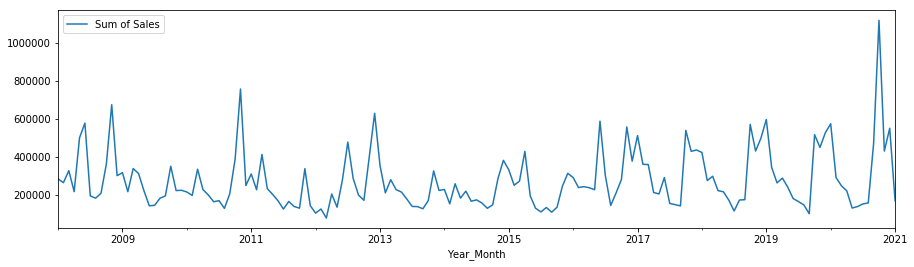

In [211]:
stationarity_testing(books_grouped)

### As we can see, based on ADFuller Test, the data is not stationary but based on KPSS Test, the data is stationary which means the data is trend stationary which means we will have to remove trend to make series strict stationary.

### First we will try to see if removing trend improves.

In [216]:
def find_trend(data):
    X = [i for i in range(len(data))]
    X = np.reshape(X, (len(X), 1))
    y = data.values
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)
    detrended = [y[i]-trend[i] for i in range(0, len(data))]
    plt.figure(figsize=(15,4))
    plt.plot(y, label='Sum of Sales')
    plt.plot(trend, label='Trend')
    plt.plot(detrended, label='Detrended')
    plt.legend(loc="upper left")
    plt.show()

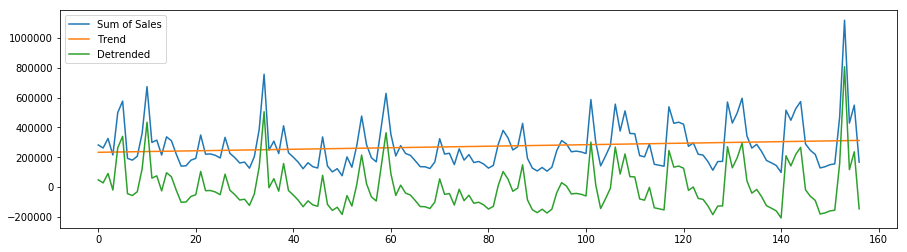

In [217]:
find_trend(books_grouped.dropna())

### Turns put, it doesn't. So now we will do differencing.

---ADFuller Test---
ADFuller Statistics:  -5.778944752109997
P-value:  5.179955882440168e-07
---KPSS Test---
KPSS Statistics:  0.04916762540489208
P-value:  0.1


Based on ADFuller Test, it is stationary
Based on KPSS Test, it is stationary




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


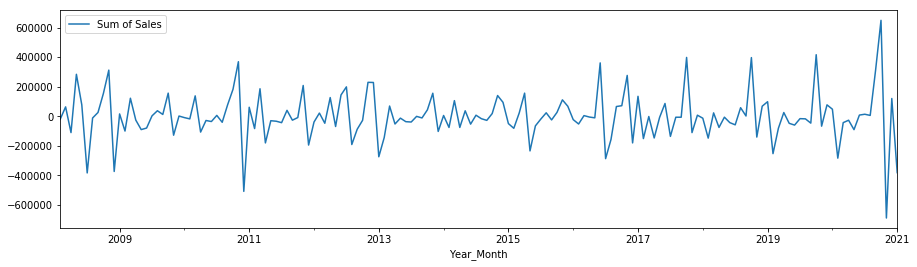

In [215]:
books_grouped_diff = books_grouped.diff()
stationarity_testing(books_grouped_diff[1:])

### Now the sales data is stationary and we can work on it.